#Fire up graphlab create

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

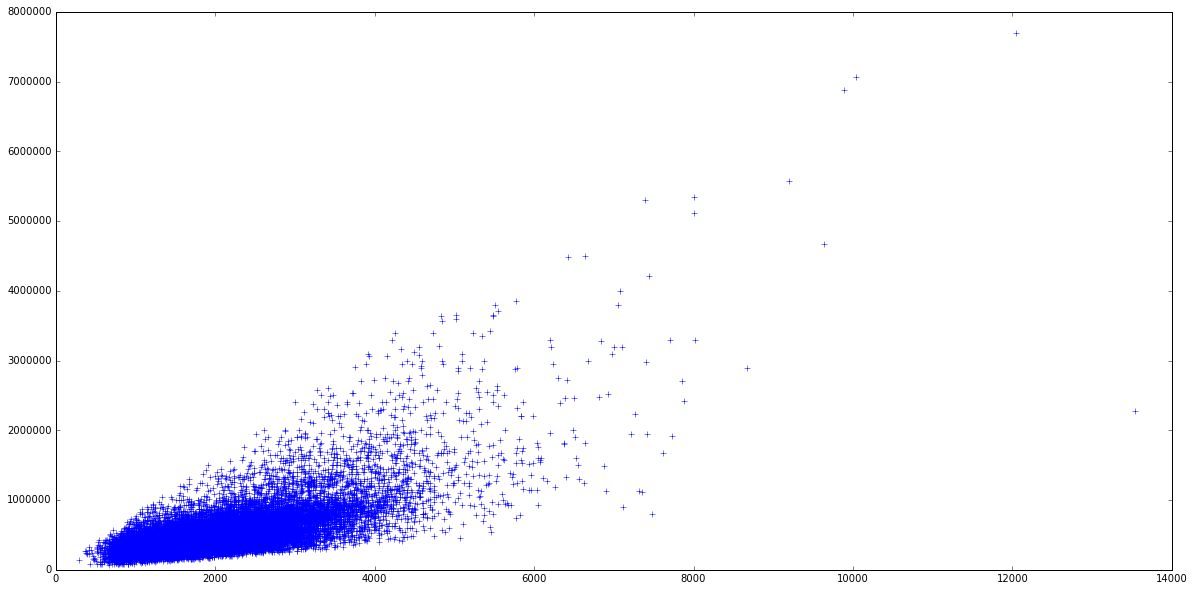

In [4]:
#sales.plot(kind = 'scatter', x = "sqft_living", y = 'price')
plt.figure(figsize=(20,10))
plt.plot(sales['sqft_living'], sales['price'], '+')

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [5]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(sales, train_size = 0.8)

##Build the regression model using only sqft_living as a feature

In [6]:
from sklearn import linear_model
sqft_model = linear_model.LinearRegression()
sqft_model.fit(np.array(train_data[['sqft_living']]), np.array(train_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#Evaluate the simple model

In [7]:
print test_data['price'].mean()

543811.861439


In [8]:
predicted = sqft_model.predict(np.array(test_data[['sqft_living']]))
from sklearn.metrics import mean_squared_error
from math import sqrt
print sqrt(mean_squared_error(np.array(test_data['price']), predicted))

266574.682207


RMSE of about \$255,170!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

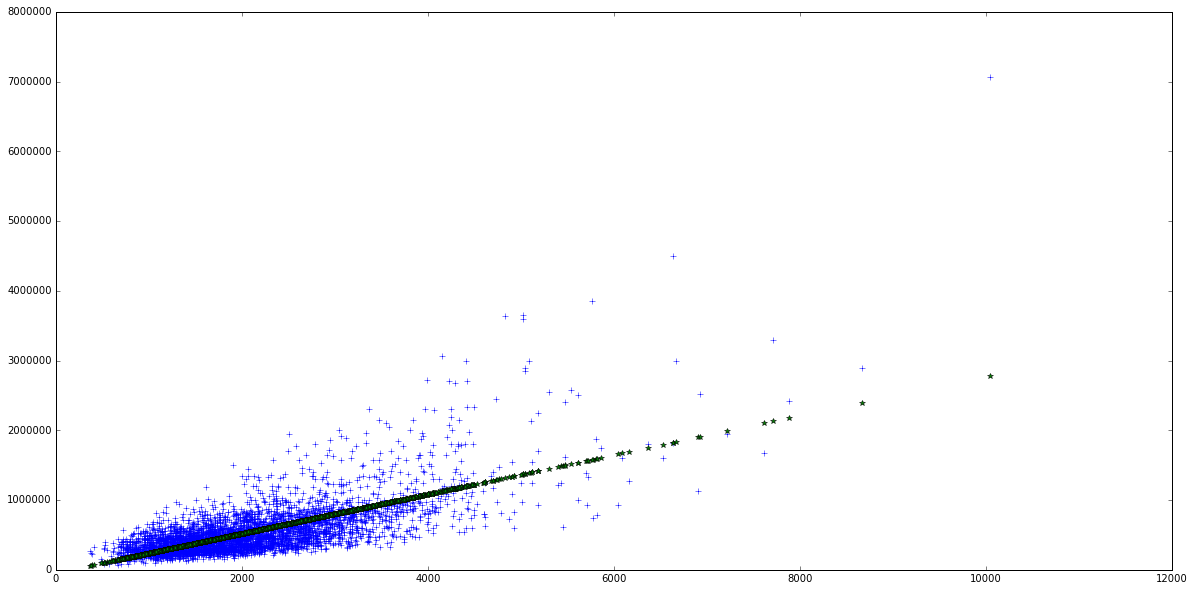

In [9]:
plt.figure(figsize=(20,10))
plt.plot(test_data['sqft_living'], test_data['price'], '+', test_data['sqft_living'], predicted, '*')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [10]:
print sqft_model.intercept_,' ', sqft_model.coef_
#sqft_model.get('coefficients)

-46507.8137474   [ 281.85145935]


#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [11]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [12]:
sales[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
5,4,4.50,5420,101930,1.0,98053
6,3,2.25,1715,6819,2.0,98003
7,3,1.50,1060,9711,1.0,98198
8,3,1.00,1780,7470,1.0,98146
9,3,2.50,1890,6560,2.0,98038


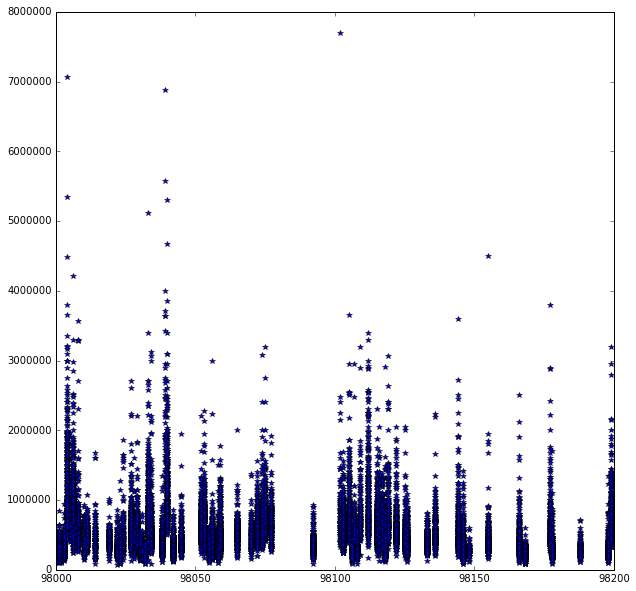

In [13]:
plt.figure(figsize = (10,10))
plt.plot(sales['zipcode'], sales['price'], '*')
#sales.plot(kind = 'box', x='zipcode', y= 'price')
#learn how to do box plot in pandas

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [14]:
my_feature_model = linear_model.LinearRegression()
my_feature_model.fit(np.array(train_data[my_features]), np.array(train_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


##Comparing the results of the simple model with adding more features

In [16]:
predictedsec = my_feature_model.predict(np.array(test_data[my_features]))
print sqrt(mean_squared_error(np.array(test_data['price']), predicted))
print sqrt(mean_squared_error(np.array(test_data['price']), predictedsec))
#why there is such a big difference ?

266574.682207
262050.37897


The RMSE goes down from \$255,170 to \$179,508 with more features.

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [17]:
house1 = sales[sales['id']==5309101200]

In [18]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [19]:
print house1['price']
house1

1054    620000
Name: price, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [20]:
print sqft_model.predict(np.array(house1[['sqft_living']]))

[ 629935.68869377]


In [21]:
print my_feature_model.predict(np.array(house1[my_features]))

[ 633475.59713577]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [22]:
house2 = sales[sales['id']==1925069082]

In [23]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [24]:
print sqft_model.predict(np.array(house2[['sqft_living']]))

[ 1261282.95763881]


In [25]:
print my_feature_model.predict(np.array(house2[my_features]))

[ 1268620.9970288]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [26]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [27]:
#print my_feature_model.predict(np.array(pd.DataFrame(bill_gates)))
print my_feature_model.predict(np.array([map (lambda x : x[0], [bill_gates[key] for key in my_features])], dtype=float))

[ 15678084.70182841]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

In [28]:
sales[sales['zipcode'] == 98039]['price'].mean()

2160606.6000000001

In [29]:
len(sales)

21613

In [30]:
sales[((sales['sqft_living'] >= 2000) & (sales['sqft_living'] < 4000))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
24,3814700200,20141120T000000,329000,3,2.25,2450,6500,2.0,0,0,...,8,2450,0,1985,0,98030,47.3739,-122.172,2200,6865
26,1794500383,20140626T000000,937000,3,1.75,2450,2691,2.0,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
29,1873100390,20150302T000000,719000,4,2.50,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026
30,8562750320,20141110T000000,580500,3,2.50,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
32,461000390,20140624T000000,687500,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000


In [31]:
9214.0/21613.0

0.4263174941007727

In [32]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [33]:
print advanced_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [34]:
sales[advanced_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,98178,3,7,0,0,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,98125,3,7,0,0,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,98028,3,6,0,0,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,98136,5,7,0,0,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,98074,3,8,0,0,1680,0,1987,0,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,98053,3,11,0,0,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,3,2.25,1715,6819,2.0,98003,3,7,0,0,1715,0,1995,0,47.3097,-122.327,2238,6819
7,3,1.50,1060,9711,1.0,98198,3,7,0,0,1060,0,1963,0,47.4095,-122.315,1650,9711
8,3,1.00,1780,7470,1.0,98146,3,7,0,0,1050,730,1960,0,47.5123,-122.337,1780,8113
9,3,2.50,1890,6560,2.0,98038,3,7,0,0,1890,0,2003,0,47.3684,-122.031,2390,7570


In [35]:
advance_feature_model = linear_model.LinearRegression()
advance_feature_model.fit(np.array(train_data[advanced_features]), np.array(train_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
predicatedthd = advance_feature_model.predict(np.array(test_data[advanced_features]))

In [37]:
predicatedthd

array([ 1322443.91728964,  1519465.2645675 ,   742873.02444487, ...,
        1129337.23628554,   427000.29458604,  1283785.51702746])

In [38]:
print sqrt(mean_squared_error(np.array(test_data['price']), predicted))
print sqrt(mean_squared_error(np.array(test_data['price']), predictedsec))

266574.682207
262050.37897


In [39]:
print sqrt(mean_squared_error(np.array(test_data['price']), predicatedthd))

200903.132593
